In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits,ascii
import pandas as pd
import cmasher as cmr
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u

In [9]:
sample = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
sample = sample[sample["v_asym_g"]/sample["v_asym_g_err"]>3]
sample = sample[sample["v_asym_s"]/sample["v_asym_s_err"]>3]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
ssp = pd.read_csv("MAGPI_csv/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
prospect= prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]
bpt= bpt[bpt["MAGPIID"].isin(sample["MAGPIID"])]
ssp= ssp[ssp["MAGPIID"].isin(sample["MAGPIID"])]

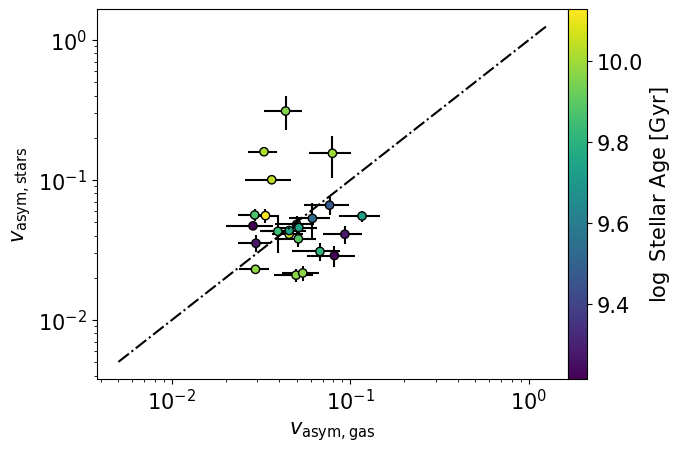

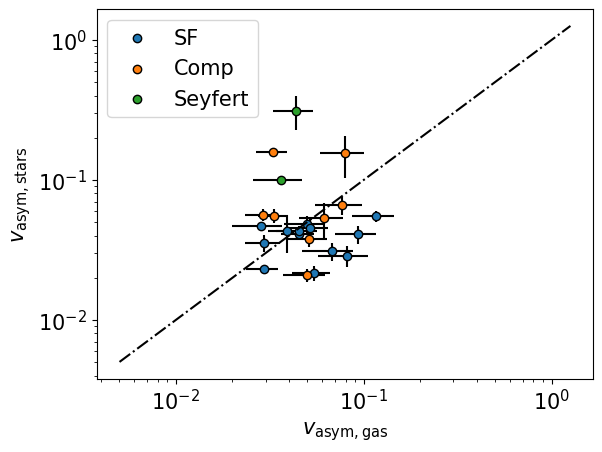

In [10]:
vg = sample["v_asym_g"].to_numpy()
vg_err = sample['v_asym_g_err'].to_numpy()
vs = sample["v_asym_s"].to_numpy()
vs_err = sample["v_asym_s_err"].to_numpy()

fig,ax = plt.subplots()
p=ax.scatter(vs,vg,ec="k",c=ssp["logage_MW_2re"].to_numpy(),zorder=2)
ax.errorbar(vs,vg,xerr=vs_err,yerr=vg_err,fmt=".k",zorder=1)
ax.plot(np.logspace(-2.3,0.1),np.logspace(-2.3,0.1),ls='dashdot',color="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$v_{\rm asym,gas}$")
ax.set_ylabel(r"$v_{\rm asym,stars}$")
plt.colorbar(p,ax=ax,label=r"$\log$ Stellar Age [Gyr]",pad=0,fraction=0.05)
plt.show()

fig,ax = plt.subplots()
for i,lab in zip([1,0,2],["SF","Comp","Seyfert"]):
    ax.scatter(vs[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==i],vg[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==i],
               ec="k",zorder=2,label=lab)
    ax.errorbar(vs[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==i],vg[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==i],
                xerr=vs_err[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==i],
                yerr=vg_err[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==i],fmt=".k",zorder=1)
ax.plot(np.logspace(-2.3,0.1),np.logspace(-2.3,0.1),ls='dashdot',color="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$v_{\rm asym,gas}$")
ax.set_ylabel(r"$v_{\rm asym,stars}$")
ax.legend()
plt.show()

/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_31849/1494097953.py:19: RuntimeWarning: divide by zero encountered in log10
  if 0.5 > (np.log10(y) - np.log10((x**0.712)*(10**-7.293))) > -1:
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_31849/1494097953.py:21: RuntimeWarning: divide by zero encountered in log10
  if (np.log10(y) - np.log10((x**0.712)*(10**-7.293))) > 0.5:
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_31849/1494097953.py:23: RuntimeWarning: divide by zero encountered in log10
  if (np.log10(y) - np.log10((x**0.712)*(10**-7.293))) < -1:
/Volumes/DS/MAGPI/venv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3648: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_31849/1494097953.py:51: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor r

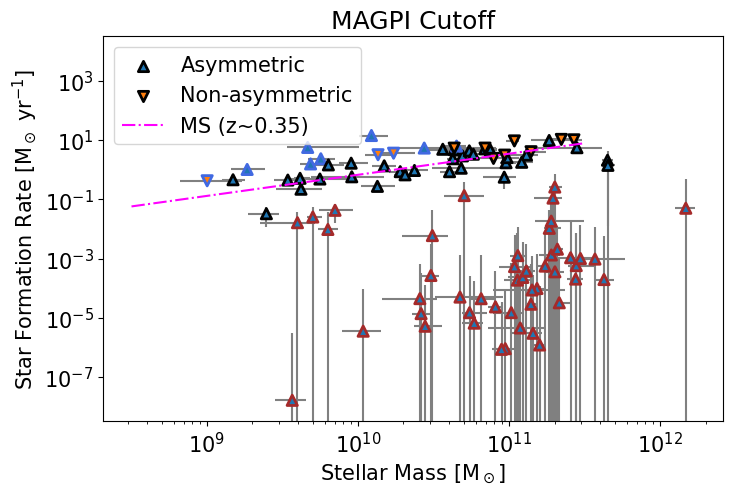

In [11]:
xx = np.logspace(8.5,11.5, 55)
MS = (xx**0.712)*(10**-7.293)

sample = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
ssp = pd.read_csv("MAGPI_csv/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
prospect= prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]
mass = prospect["StellarMass_median"].to_numpy()
mass_err_16 = mass-prospect["StellarMass_16"].to_numpy()
mass_err_84 = prospect["StellarMass_84"].to_numpy()-mass
bpt= bpt[bpt["MAGPIID"].isin(sample["MAGPIID"])]
ssp= ssp[ssp["MAGPIID"].isin(sample["MAGPIID"])]
SFR = bpt["SFR, dust corrected"].to_numpy()
SFR_err = bpt["SFR_err"].to_numpy()
asym = sample["v_asym_s"].to_numpy()
D_SFR = []
for x,y in zip(mass,SFR):
    if 0.5 > (np.log10(y) - np.log10((x**0.712)*(10**-7.293))) > -1:
        D_SFR.append(1) # Star Forming
    if (np.log10(y) - np.log10((x**0.712)*(10**-7.293))) > 0.5:
        D_SFR.append(2) # Starbursting
    if (np.log10(y) - np.log10((x**0.712)*(10**-7.293))) < -1:
        D_SFR.append(0)
colors=[]
for i in D_SFR:
    if i==1:
        colors.append("k")
    if i==2:
        colors.append("royalblue")
    if i==0:
        colors.append("brown")
colors=np.array(colors)
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(mass[asym>0.04],SFR[asym>0.04], zorder=2, ec=colors[asym>0.04], label="Asymmetric",s=55,linewidths=1, marker="^",lw=2)
ax.errorbar(mass[asym>0.04],SFR[asym>0.04],xerr=np.array([mass_err_16[asym>0.04],mass_err_84[asym>0.04]]),yerr=SFR_err[asym>0.04], c='gray', zorder=1, ls="")
ax.scatter(mass[asym<0.04],SFR[asym<0.04], zorder=2, ec=colors[asym<0.04], label="Non-asymmetric",s=55, linewidths=1, marker="v",lw=2)
ax.errorbar(mass[asym<0.04],SFR[asym<0.04],xerr=np.array([mass_err_16[asym<0.04],mass_err_84[asym<0.04]]), yerr=SFR_err[asym<0.04], c='gray', zorder=1, ls="")
ax.plot(xx,MS, c="magenta", ls="dashdot", label="MS (z~0.35)")
#ax.plot(xx,MS*0.1, c="magenta", ls="dashdot")
#ax.plot(xx,MS*10, c="magenta", ls="dashdot")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10**(-8.5),10**(4.5))
ax.set_xlabel("Stellar Mass [M$_\odot$]")
ax.set_ylabel("Star Formation Rate [M$_\odot$ yr$^{-1}$]")
ax.legend(loc="upper left")
ax.set_title("MAGPI Cutoff")
for i in range(2):
    ax.legend_.legendHandles[i].set_edgecolor("k")
plt.savefig("plots/paper2/SFMS_asym_Ha.pdf", bbox_inches="tight")

In [12]:
sample = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
#sample=sample[sample["v_asym_tot"]/sample['v_asym_tot_err']>3]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]
bpt = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_BPT.csv")
bpt = bpt[bpt['MAGPIID'].isin(sample["MAGPIID"])]

PearsonRResult(statistic=-0.5290493734909836, pvalue=3.907896424941457e-05)
PearsonRResult(statistic=-0.27122717805209584, pvalue=0.04727512091310414)


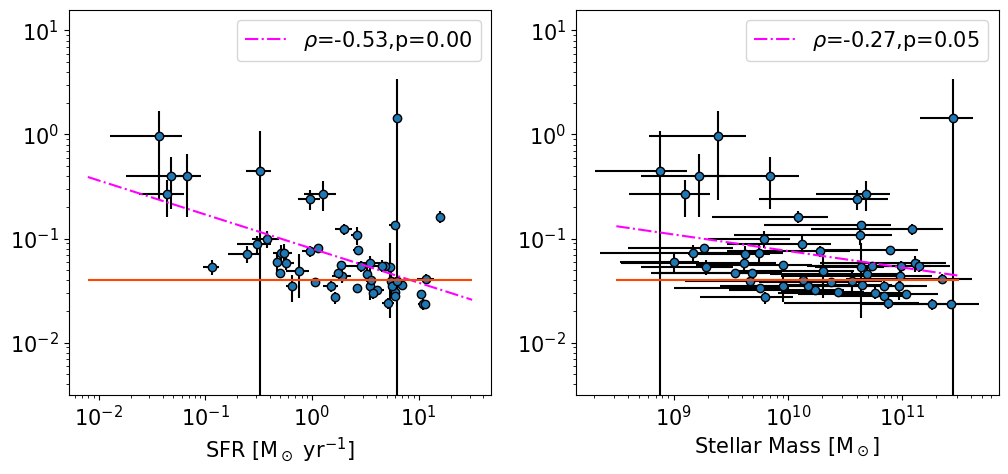

In [13]:
import scipy
x = np.log10(sample['v_asym_tot'].to_numpy())
y = np.log10(bpt['SFR, dust corrected'].to_numpy())
z = np.log10(prospect["StellarMass_median"].to_numpy())
x = x[~np.isnan(y)]
z = z[~np.isnan(y)]
y = y[~np.isnan(y)]
y = y[~np.isnan(x)]
z = z[~np.isnan(x)]
x = x[~np.isnan(x)]
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
lt = [y,z]
for i in range(2):
    res = scipy.stats.linregress(lt[i],x)
    per = scipy.stats.pearsonr(lt[i],x)
    print(per)
    if i==0:
        ax1.scatter(bpt["SFR, dust corrected"].to_numpy(),sample["v_asym_tot"].to_numpy(),zorder=2,ec="k")
        ax1.errorbar(bpt["SFR, dust corrected"].to_numpy(),sample["v_asym_tot"].to_numpy(), xerr=bpt["SFR_err"].to_numpy(),yerr=sample['v_asym_tot_err'].to_numpy(), fmt=".k",zorder=1)
        xx = np.logspace(-2.1,1.5)
        ax1.plot(xx,(10**res[1])*(xx**res[0]),ls="dashdot",zorder=2,color="magenta",label=r"$\rho$="+f"{per[0]:.2f}"+r",p="+f"{per[1]:.2f}")
        ax1.set_xscale("log")
        ax1.set_yscale("log")
        ax1.set_ylim(10**(-2.5),10**(1.2))
        ax1.hlines(0.04,xx[0],xx[-1],zorder=2,color="orangered")
        ax1.legend()
        ax1.set_xlabel(r"SFR [M$_\odot$ yr$^{-1}$]")
    if i==1:
        ax2.scatter(prospect["StellarMass_median"].to_numpy(),sample['v_asym_tot'].to_numpy(),zorder=2,ec="k")
        ax2.errorbar(prospect["StellarMass_median"].to_numpy(),sample["v_asym_tot"].to_numpy(), xerr=prospect["StellarMass_16"].to_numpy(),
                     yerr=sample['v_asym_tot_err'].to_numpy(), fmt=".k",zorder=1)
        xx = np.logspace(8.5,11.5)
        ax2.plot(xx,(10**res[1])*(xx**res[0]),ls="dashdot",zorder=2,color="magenta",label=r"$\rho$="+f"{per[0]:.2f}"+r",p="+f"{per[1]:.2f}")
        ax2.set_xscale("log")
        ax2.set_yscale("log")
        ax2.set_ylim(10**(-2.5),10**(1.2))
        ax2.hlines(0.04,xx[0],xx[-1],zorder=2,color="orangered")
        ax2.legend()
        ax2.set_xlabel(r"Stellar Mass [M$_\odot$]")
plt.show()

In [15]:
file =pd.read_csv("MAGPI_Emission_Lines/MAGPI1207/MAGPI1207_source_catalogue.csv",skiprows=16)
file = file[file["MAGPIID"].isin([1207197197,1207128248,1207181305])]
galaxy = file["MAGPIID"].to_numpy()
x = file["xmax"].to_numpy()
y = file["ymax"].to_numpy()
z = file["z"].to_numpy()

In [16]:
print(galaxy)

[1207128248 1207181305 1207197197]


In [17]:
r1=np.sqrt((x[0] - x[-1])**2 + (y[0]-y[-1])**2)
r2=np.sqrt((x[1] - x[-1])**2 + (y[1]-y[-1])**2)

In [18]:
dl = cosmo.comoving_distance(z[0]).to(u.kpc).value
r1 = np.radians((r1*0.2)/3600)*dl
r2 = np.radians((r2*0.2)/3600)*dl

In [19]:
print(f"MAGPI{galaxy[0]}, {r1:.2f}")
print(f"MAGPI{galaxy[1]}, {r2:.2f}")

MAGPI1207128248, 109.09
MAGPI1207181305, 138.82


In [20]:
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin([1207197197,1207128248,1207181305])]
mass = prospect["StellarMass_median"].to_numpy()
massrat1 = mass[0]/mass[-1]
massrat2 = mass[1]/mass[-1]

In [21]:
print(f"{massrat1:.2f}")
print(f"{massrat2:.2f}")

0.28
0.07


In [22]:
M2 = pd.read_csv("MAGPI_csv/kinemetry_sample_M2.csv")
print(len(M2))
env = pd.read_csv("MAGPI_csv/kinemetry_sample_env.csv")
M2 = M2[M2["v_asym_15re_err"]<0.1]
print(len(M2))
env = env[env["MAGPIID"].isin(M2["MAGPIID"])]
print(len(env))
M2 = M2[M2["MAGPIID"].isin(env["MAGPIID"])]
print(len(M2))

54
47
43
43


In [23]:
cen = M2[env["BCG?"].to_numpy()]
print(cen[cen["v_asym_tot"]>0.04])
sat = M2[~env["BCG?"].to_numpy()]
print(sat[sat["v_asym_tot"] > 0.04])

       MAGPIID  v_asym_05re  v_asym_05re_err  v_asym_15re  v_asym_15re_err  \
0   1201302222     0.062283         0.017017     0.067625         0.011522   
6   1204198199     0.067380         0.027315     0.036533         0.003297   
8   1205197197     0.049525         0.018738     0.037542         0.003848   
38  2301109255     0.034809         0.003678     0.058794         0.005703   
45  2304196198     0.029242         0.008826     0.071285         0.007793   
49  2308198197     0.028405         0.005363     0.045069         0.008093   
52  2310199196     0.145814         0.017235     0.182393         0.014072   

    v_asym_tot  v_asym_tot_err  k51_05re  k51_05re_err  k51_15re  \
0     0.073141        0.012732  0.027058      0.016308  0.031614   
6     0.043591        0.006092  0.049369      0.035127  0.018344   
8     0.053746        0.036385  0.037320      0.019240  0.027085   
38    0.040050        0.001713  0.009595      0.003799  0.021025   
45    0.055039        0.006993  0.0

In [24]:
M2 =pd.read_csv("MAGPI_csv/kinemetry_sample_M2.csv")
notM2 = M2[M2["v_asym_15re_err"]>0.1]

In [25]:
notM2

,MAGPIID,v_asym_05re,v_asym_05re_err,v_asym_15re,v_asym_15re_err,v_asym_tot,v_asym_tot_err,k51_05re,k51_05re_err,k51_15re,k51_15re_err,k51_tot,k51_tot_err,SNR_05re,SNR_15re
3,1203152196,0.207028,0.127484,1.553391,0.955338,0.265683,0.103108,0.124679,0.090720,1.440226,0.476491,0.194719,0.083477,16.002440,NaN
10,1206243216,0.144976,0.048006,1.113013,1.674050,0.402230,0.207847,0.077775,0.039655,1.027899,1.864380,0.401370,0.262472,22.886801,0.986595
14,1207197197,0.422071,0.086374,1.050160,0.543711,1.448167,1.989017,0.053366,0.030052,0.746481,0.499322,0.387175,0.439203,40.482814,7.266887
17,1501178229,0.575155,0.845843,9.134728,11.349163,0.956556,0.722062,0.416222,0.857782,3.840502,5.170907,0.624059,0.702012,15.853861,0.239729
18,1501224275,0.187199,0.055552,1.912476,1.818887,0.270468,0.085024,0.109816,0.049229,2.388380,2.854645,0.200127,0.108037,20.674060,0.243893
36,1534282147,0.677932,1.853328,0.306700,0.142795,0.448041,0.630728,0.480602,1.975524,0.257133,0.202175,0.351791,0.674969,12.864282,6.628529
46,2304279199,0.033328,0.008666,0.387557,0.101590,0.054059,0.006357,0.017262,0.010919,0.337763,0.154890,0.026738,0.006125,21.380188,1.165768


In [26]:
M2 = M2[M2['v_asym_15re_err']<0.1]
M2

,MAGPIID,v_asym_05re,v_asym_05re_err,v_asym_15re,v_asym_15re_err,v_asym_tot,v_asym_tot_err,k51_05re,k51_05re_err,k51_15re,k51_15re_err,k51_tot,k51_tot_err,SNR_05re,SNR_15re
0,1201302222,0.062283,0.017017,0.067625,0.011522,0.073141,0.012732,0.027058,0.016308,0.031614,0.015903,0.044128,0.014668,46.392823,25.072726
1,1202197197,0.024471,0.001550,0.025882,0.002062,0.029172,0.002088,0.013631,0.003488,0.015050,0.003776,0.015343,0.001565,53.223217,27.817842
2,1203076068,0.019183,0.002519,0.042807,0.004597,0.030469,0.001544,0.004627,0.002228,0.020296,0.006009,0.011820,0.001831,93.010916,34.231019
4,1203247089,0.035798,0.010844,0.103126,0.025299,0.059105,0.011555,0.015667,0.008684,0.077217,0.034619,0.037217,0.012927,54.069401,14.847364
5,1203287367,0.054617,0.019548,0.205117,0.048144,0.099442,0.017907,0.031479,0.017191,0.106489,0.057772,0.059750,0.021602,NaN,NaN
6,1204198199,0.067380,0.027315,0.036533,0.003297,0.043591,0.006092,0.049369,0.035127,0.018344,0.006513,0.029214,0.005643,6.867296,11.202457
7,1205196165,0.020055,0.007543,0.070926,0.010644,0.034741,0.010067,0.014821,0.008431,0.100639,0.023426,0.036714,0.010873,35.349898,9.912172
8,1205197197,0.049525,0.018738,0.037542,0.003848,0.053746,0.036385,0.037320,0.019240,0.027085,0.006702,0.047125,0.034074,23.562331,25.805253
9,1206151090,0.028523,0.003935,0.032861,0.003006,0.033835,0.002244,0.007272,0.002775,0.018601,0.007528,0.012793,0.002834,132.885520,60.643874
11,1206322202,0.036912,0.008226,0.074670,0.015343,0.046692,0.004518,0.015593,0.007184,0.050457,0.031181,0.018641,0.006271,57.305509,7.595860


In [27]:
M2 = pd.read_csv("MAGPI_csv/kinemetry_sample_M2.csv")
print(len(M2))
M2 = M2[M2["v_asym_15re_err"]<0.1]
print(len(M2))
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
env = pd.read_csv("MAGPI_csv/kinemetry_sample_env.csv")
print(len(env))
env = env[env["MAGPIID"].isin(M2["MAGPIID"])]
print(len(env))
M2 = M2[M2["MAGPIID"].isin(env["MAGPIID"])]
print(len(M2))
prospect = prospect[prospect["MAGPIID"].isin(M2["MAGPIID"])]
bpt = bpt[bpt['MAGPIID'].isin(M2["MAGPIID"])]
z = ["{:.3f}".format(i) for i in prospect["z"].to_numpy()]
lHa = ["{:.3f}".format(i/(5.5e-2)) for i in bpt["SFR, dust corrected"].to_numpy()]
mass = ["{:.3f}".format(i*1e-10) for i in prospect["StellarMass_median"].to_numpy()]
asym =[]
asym_out = []
cen_sat = []
for i in range(len(M2["v_asym_tot"])):
    if M2["v_asym_tot"].to_numpy()[i]>0.04:
        asym.append("Asymmetric")
    if M2["v_asym_tot"].to_numpy()[i]<0.04:
        asym.append("Not Asymmetric")
    if M2["v_asym_15re"].to_numpy()[i]>M2["v_asym_05re"].to_numpy()[i]:
        asym_out.append(True)
    if M2["v_asym_15re"].to_numpy()[i]<M2["v_asym_05re"].to_numpy()[i]:
        asym_out.append(False)
    if env["BCG?"].to_numpy()[i]:
        cen_sat.append("Cen")
    if not env["BCG?"].to_numpy()[i]:
        cen_sat.append("Sat")
df = pd.DataFrame({"MAGPIID":M2["MAGPIID"].to_numpy(),
                   "z":z,
                   "Stellar Mass":mass,
                   "ha lum":lHa,
                   "IonSource":bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"].to_numpy(),
                   "Cen?":cen_sat,
                   "GrpN":env["N_Gals"].to_numpy(),
                   "Asym":asym,
                   "AsymOut":asym_out,
                   })

env = pd.read_csv("MAGPI_csv/kinemetry_sample_env.csv")
M2 = pd.read_csv("MAGPI_csv/kinemetry_sample_M2.csv")
M2 = M2[M2["v_asym_15re_err"]<0.1]
M2 = M2[~M2["MAGPIID"].isin(env["MAGPIID"])]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
prospect = prospect[prospect["MAGPIID"].isin(M2["MAGPIID"])]

bpt = bpt[bpt['MAGPIID'].isin(M2["MAGPIID"])]
z = ["{:.3f}".format(i) for i in prospect["z"].to_numpy()]
lHa = ["{:.3f}".format(i/(5.5e-2)) for i in bpt["SFR, dust corrected"].to_numpy()]
mass = ["{:.3f}".format(i*1e-10) for i in prospect["StellarMass_median"].to_numpy()]
asym =[]
asym_out = []

for i in range(len(M2["v_asym_tot"])):
    if M2["v_asym_tot"].to_numpy()[i]>0.04:
        asym.append("Asymmetric")
    if M2["v_asym_tot"].to_numpy()[i]<0.04:
        asym.append("Not Asymmetric")
    if M2["v_asym_15re"].to_numpy()[i]>M2["v_asym_05re"].to_numpy()[i]:
        asym_out.append(True)
    if M2["v_asym_15re"].to_numpy()[i]<M2["v_asym_05re"].to_numpy()[i]:
        asym_out.append(False)
df1 = pd.DataFrame({"MAGPIID":M2["MAGPIID"].to_numpy(),
                   "z":z,
                   "Stellar Mass":mass,
                   "ha lum":lHa,
                   "IonSource":bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"].to_numpy(),
                   "Cen?":[np.nan,np.nan,np.nan,np.nan],
                   "GrpN":[np.nan,np.nan,np.nan,np.nan],
                   "Asym":asym,
                   "AsymOut":asym_out,
                   })
df = pd.concat([df1,df.loc[:]])
df.to_csv("MAGPI_csv/MAGPI_kinemetry_sample_properties.csv",index=False)

54
47
807
43
43


In [28]:
master = pd.read_csv("MAGPI_csv/MAGPI_master_source_catalogue.csv",skiprows=16)
sample = pd.read_csv("MAGPI_csv/kinemetry_sample_M2.csv")
sample = sample[sample["v_asym_15re_err"]<0.1]
master_sample = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_source_catalogue.csv")
master_sample = master_sample[master_sample["MAGPIID"].isin(sample["MAGPIID"])]
env = pd.read_csv("MAGPI_csv/kinemetry_sample_env.csv")
env2 = env[env["MAGPIID"].isin(sample["MAGPIID"])]
sample = sample[sample["MAGPIID"].isin(env2["MAGPIID"])]

In [29]:
d1 = []
for i in range(len(env2['GroupName'])):
    group1 = env[env["GroupName"]==env2["GroupName"].to_numpy()[i]]
    #cen = group1[group1["BCG?"]]
    print(sample["MAGPIID"].to_numpy()[i])
    #group1 = group1[~group1["BCG?"]]
    x = master[master["MAGPIID"].isin(group1["MAGPIID"])]['xmax'].to_numpy()
    y = master[master["MAGPIID"].isin(group1["MAGPIID"])]['ymax'].to_numpy()
    z = master[master["MAGPIID"].isin(group1['MAGPIID'])]["z"].to_numpy()
    DL = cosmo.comoving_distance(z).to(u.kpc).value
    x0 = master[master["MAGPIID"].isin([sample["MAGPIID"].to_numpy()[i]])]['xmax'].to_numpy()[0]
    y0 = master[master["MAGPIID"].isin([sample["MAGPIID"].to_numpy()[i]])]['ymax'].to_numpy()[0]
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    r = np.radians((r*0.2)/3600)*DL
    print(group1["MAGPIID"].to_numpy())
    print(r)
    d1.append(np.min(r[r>0]))
d1 = np.array(d1)

1201302222
[1201278070 1201302222]
[183.02789007   0.        ]
1202197197
[1202197197 1202221243]
[ 0.         60.50920756]
1203076068
[1203053204 1203070184 1203076068 1203081107 1203087201 1203103298
 1203153287 1203196196 1203247089 1203287367]
[168.39806649 142.40569946   0.          47.84620686 163.80905992
 283.23918829 283.33414195 215.745745   209.64733648 447.9898691 ]
1203247089
[1203053204 1203070184 1203076068 1203081107 1203087201 1203103298
 1203153287 1203196196 1203247089 1203287367]
[275.33867325 246.28190253 209.83621939 203.18383515 239.72817273
 310.42289101 267.51387854 145.75312539   0.         343.8243985 ]
1203287367
[1203053204 1203070184 1203076068 1203081107 1203087201 1203103298
 1203153287 1203196196 1203247089 1203287367]
[348.16635752 348.01458631 445.71765387 403.65484174 319.03469987
 240.34924251 190.47930655 238.18954981 341.77259112   0.        ]
1204198199
[1204071128 1204198199 1204236221]
[182.6196581    0.          55.06343769]
1205196165
[120509

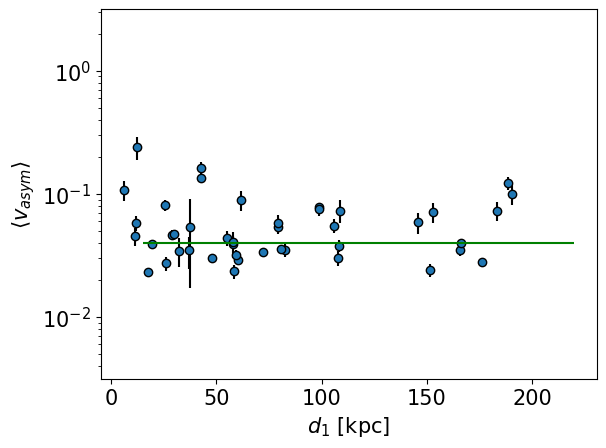

In [30]:
fig,ax = plt.subplots()
ax.scatter(d1,sample["v_asym_tot"].to_numpy(),ec="k",zorder=2)
ax.errorbar(d1,sample["v_asym_tot"].to_numpy(),fmt=".k",yerr=sample["v_asym_tot_err"],zorder=1)
ax.hlines(0.04,xmin=15,xmax=220,colors="green")
ax.set_yscale("log")
ax.set_xlabel(r"$d_1$ [kpc]")
ax.set_ylabel(r"$\langle v_{asym} \rangle$")
ax.set_ylim(10**(-2.5),10**(0.5))
plt.savefig("plots/paper1/v_asym_d1.pdf",bbox_inches="tight")

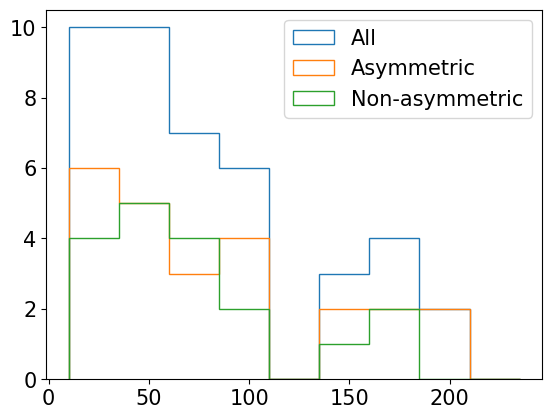

In [31]:
fig,ax =plt.subplots()
ax.hist(d1,histtype="step",label='All',bins=np.arange(10,260,25))
ax.hist(d1[np.array(sample['v_asym_tot']>0.04)],histtype="step",label='Asymmetric',bins=np.arange(10,260,25))
ax.hist(d1[np.array(sample['v_asym_tot']<0.04)],histtype="step",label="Non-asymmetric",bins=np.arange(10,260,25))
ax.legend()
#ax.set_ylim(0,9)
plt.savefig("plots/paper1/v_asym_ds_hist.pdf",bbox_inches="tight")

In [32]:
asym = ax.hist(d1[np.array(sample['v_asym_tot']>0.04)],histtype="step",label='Asymmetric',bins=np.arange(10,260,25))[0]
nasym = ax.hist(d1[np.array(sample['v_asym_tot']<0.04)],histtype="step",label="Non-asymmetric",bins=np.arange(10,260,25))[0]
all = ax.hist(d1,histtype="step",label='All',bins=np.arange(10,260,25))[0]

In [33]:
(asym/all)*100

/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_31849/4066099199.py:1: RuntimeWarning: invalid value encountered in divide
  (asym/all)*100


array([ 60.        ,  50.        ,  42.85714286,  66.66666667,
                nan,  66.66666667,  50.        , 100.        ,
                nan])

In [34]:
def scatter_hist(x, y, ax, ax_histx,binwidth):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    # ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    p = ax.scatter(x, y, zorder=2, ec="k")

    # now determine nice limits by hand:

    xymax = np.max(np.abs(x))
    lim = (int(xymax / binwidth) + 1) * binwidth

    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    #ax_histx.yaxis.tick_right()
    #ax_histx.set_ylabel("N")
    #ax_histy.hist(y, bins=bins, orientation='horizontal')
    #ax_histy.set_yscale("log")
    return p

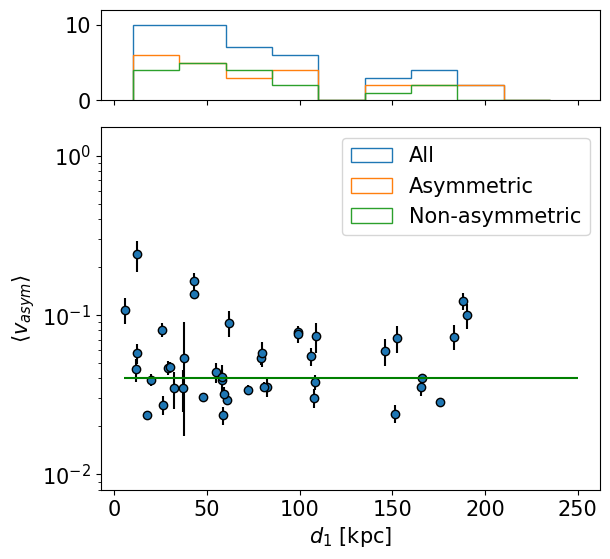

In [49]:
fig = plt.figure(figsize=(8, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2, width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.12)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.hist(d1,histtype="step",label='All',bins=np.arange(10,260,25))
ax_histx.hist(d1[np.array(sample['v_asym_tot']>0.04)],histtype="step",label='Asymmetric',bins=np.arange(10,260,25))
ax_histx.hist(d1[np.array(sample['v_asym_tot']<0.04)],histtype="step",label="Non-asymmetric",bins=np.arange(10,260,25))
ax_histx.legend()
ax.scatter(d1,sample["v_asym_tot"].to_numpy(),ec="k",zorder=2)
ax.errorbar(d1,sample["v_asym_tot"].to_numpy(),fmt=".k",yerr=sample["v_asym_tot_err"],zorder=1)
ax.hlines(0.04,xmin=5,xmax=250,colors="green")
ax.set_ylabel(r"$\langle v_{asym} \rangle$")
ax.set_xlabel(r"$d_1$ [kpc]")
ax.set_yscale("log")
ax_histx.set_ylim(0,12)
ax_histx.legend(bbox_to_anchor=(0.999,-0.3))
ax.set_ylim(0.008,1.5)
plt.savefig("plots/paper1/vasym_d1_hist.pdf",bbox_inches="tight")

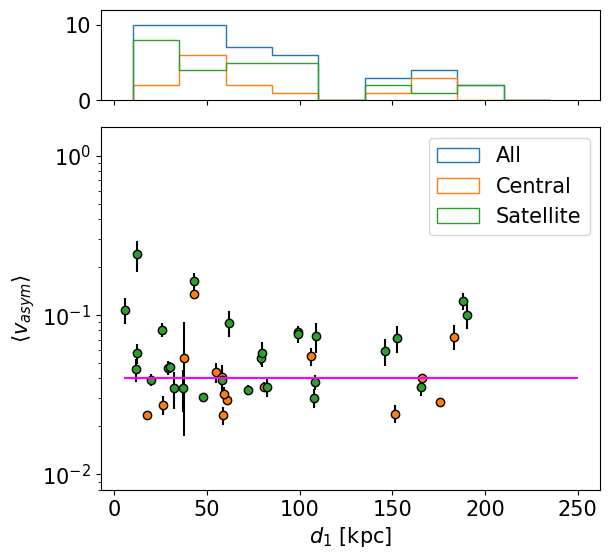

In [50]:
fig = plt.figure(figsize=(8, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2, width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.12)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.hist(d1,histtype="step",label='All',bins=np.arange(10,260,25))
ax_histx.hist(d1[np.array(env2["BCG?"])],histtype="step",label='Central',bins=np.arange(10,260,25))
ax_histx.hist(d1[~np.array(env2["BCG?"])],histtype="step",label="Satellite",bins=np.arange(10,260,25))
ax_histx.legend()
ax.scatter(d1[np.array(env2["BCG?"])],sample["v_asym_tot"].to_numpy()[np.array(env2["BCG?"])],ec="k",zorder=2,label="Central",c="tab:orange")
ax.errorbar(d1[np.array(env2["BCG?"])],sample["v_asym_tot"].to_numpy()[np.array(env2["BCG?"])],fmt=".k",yerr=sample["v_asym_tot_err"][np.array(env2["BCG?"])],zorder=1)
ax.scatter(d1[~np.array(env2["BCG?"])],sample["v_asym_tot"].to_numpy()[~np.array(env2["BCG?"])],ec="k",zorder=2,label='Satellite',c="tab:green")
ax.errorbar(d1[~np.array(env2["BCG?"])],sample["v_asym_tot"].to_numpy()[~np.array(env2["BCG?"])],fmt=".k",yerr=sample["v_asym_tot_err"][~np.array(env2["BCG?"])],zorder=1)
ax.hlines(0.04,xmin=5,xmax=250,colors="magenta")
ax.set_ylabel(r"$\langle v_{asym} \rangle$")
ax.set_xlabel(r"$d_1$ [kpc]")
ax.set_yscale("log")
ax_histx.set_ylim(0,12)
ax_histx.legend(bbox_to_anchor=(0.999,-0.3))
ax.set_ylim(0.008,1.5)
plt.savefig("plots/paper1/vasym_d1_hist_cen.pdf",bbox_inches="tight")

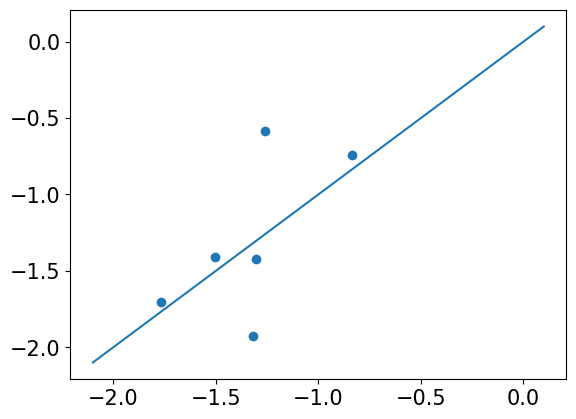

In [56]:
sample = pd.read_csv("MAGPI_csv/kinemetry_sample_M2.csv")
sample = sample[sample["v_asym_15re_err"]<0.1]
bars = sample[sample["MAGPIID"].isin([1204198197,1205197197,1207128248,1207197197,1209197197,1501244275,1506279269,1528197197,2310199196])]
plt.scatter(np.log10(bars["v_asym_05re"]),np.log10(bars["v_asym_15re"]))
plt.plot(np.linspace(-2.1,0.1),np.linspace(-2.1,0.1))